In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gpflow
from gpflow.utilities import print_summary

# The lines below are specific to the notebook format
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

I am using gpflow for GP modeling/inference. For instructions and more examples see\

https://gpflow.github.io/GPflow/develop/index.html

### Define squared exponential kernel

$$k(x,x')=\sigma^{2} \exp\left(-0.5\frac{(x-x')^{2}}{l^{2}}\right)$$

In [2]:
# Call from gpflow
k = gpflow.kernels.RBF()

# These parameters are in the lecture; you can play around with them
lengthscales = 0.1
variance = 1.3

k.lengthscales.assign(lengthscales)
k.variance.assign(variance)

Metal device set to: Apple M1 Pro


2023-11-06 09:55:28.234801: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-06 09:55:28.235182: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=0.9818150173435949>

In [3]:
# Or define yourself
def rbf_kernel(lengthscales,variance, x, x_prime):
    return(variance*np.exp(-0.5*(x-x_prime)**2/lengthscales**2))

In [4]:
## You can choose a different kernel
# k = gpflow.kernels.Matern52() 
# k = gpflow.kernels.RBF() + gpflow.kernels.Linear()
# print_summary(k)

### Define input points X and compute the covariance

In [5]:
num_inputs = 50
X = np.linspace(0.0, 1.0, num_inputs)[:, None]
K = k(X)
#K = rbf_kernel(lengthscales,variance,X,np.transpose(X)) # --> check if the results are the same with self-implemented kernel; 

In [6]:
K

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[1.30000000e+00, 1.27320788e+00, 1.19609925e+00, ...,
        1.36670147e-20, 1.89012485e-21, 2.50737480e-22],
       [1.27320788e+00, 1.30000000e+00, 1.27320788e+00, ...,
        9.47913622e-20, 1.36670147e-20, 1.89012485e-21],
       [1.19609925e+00, 1.27320788e+00, 1.30000000e+00, ...,
        6.30631704e-19, 9.47913622e-20, 1.36670147e-20],
       ...,
       [1.36670147e-20, 9.47913622e-20, 6.30631704e-19, ...,
        1.30000000e+00, 1.27320788e+00, 1.19609925e+00],
       [1.89012485e-21, 1.36670147e-20, 9.47913622e-20, ...,
        1.27320788e+00, 1.30000000e+00, 1.27320788e+00],
       [2.50737480e-22, 1.89012485e-21, 1.36670147e-20, ...,
        1.19609925e+00, 1.27320788e+00, 1.30000000e+00]])>

### Plot the covariance matrix

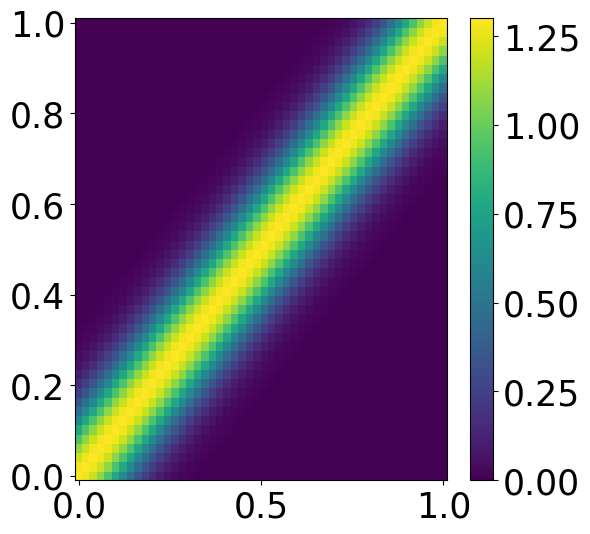

In [7]:
plt.figure(figsize=(6,6))
plt.pcolor(X.T, X, K)
plt.tick_params(axis='both', which='minor', labelsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)
cbar = plt.colorbar()
tick_font_size = 25
cbar.ax.tick_params(labelsize=tick_font_size)
#cbar.plt.tick_params(labelsize=tick_font_size)
plt.savefig('figures/covar_example.png')

### Now sample from a Gaussian process

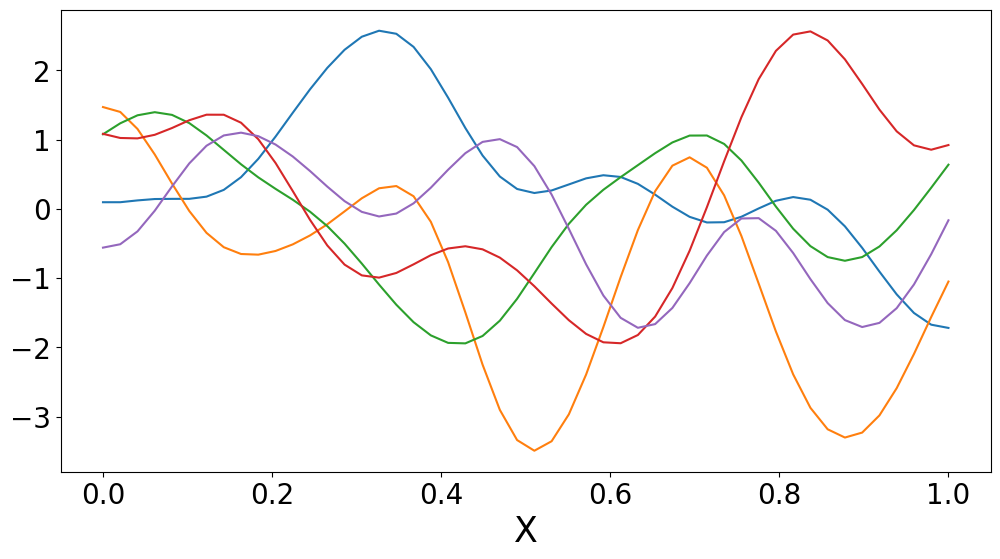

In [8]:
num_samples = 5
samples = np.random.multivariate_normal(np.zeros(num_inputs), K, num_samples).T
plt.plot(X, samples)
plt.xlabel('X', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)